## Create Latitude and Longitude Combinations

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
from citipy import citipy

In [3]:
# create set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.0, high=90.0, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

## 6.1.5 Generate Random World Cities

In [5]:
# create list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # add to cities list
    if city not in cities:
        cities.append(city)

# print the city count
len(cities)

629

## 6.2.4 Make a Request for Data to an API

https://requests.kennethreitz.org/en/master/

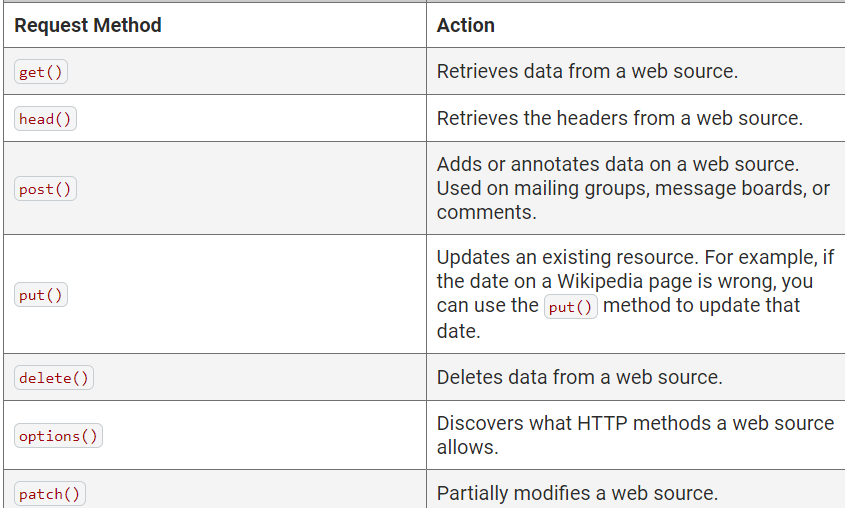

In [7]:
# import the API key
from config import weather_api_key

# import the datetime module from the datetime library
from datetime import datetime

In [23]:
city_url =  "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [25]:
query_url = city_url + "&q=" + city

In [26]:
weather_response = requests.get(query_url)
if weather_response.status_code == 200:
    print(f"City Weather found")
else:
    print(f"City weather not found")

City Weather found


In [27]:
weather_json = weather_response.json()

In [28]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [29]:
weather_json.get("main")

{'temp': 46.09,
 'feels_like': 44.13,
 'temp_min': 46.09,
 'temp_max': 46.09,
 'pressure': 1024,
 'humidity': 74,
 'sea_level': 1024,
 'grnd_level': 1024}

In [30]:
weather_response.text

'{"coord":{"lon":115.3333,"lat":-33.65},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":46.09,"feels_like":44.13,"temp_min":46.09,"temp_max":46.09,"pressure":1024,"humidity":74,"sea_level":1024,"grnd_level":1024},"visibility":10000,"wind":{"speed":4.29,"deg":71,"gust":4.41},"clouds":{"all":0},"dt":1632257186,"sys":{"type":2,"id":2003721,"country":"AU","sunrise":1632262109,"sunset":1632305672},"timezone":28800,"id":2075265,"name":"Busselton","cod":200}'

In [31]:
weather_json

{'coord': {'lon': 115.3333, 'lat': -33.65},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 46.09,
  'feels_like': 44.13,
  'temp_min': 46.09,
  'temp_max': 46.09,
  'pressure': 1024,
  'humidity': 74,
  'sea_level': 1024,
  'grnd_level': 1024},
 'visibility': 10000,
 'wind': {'speed': 4.29, 'deg': 71, 'gust': 4.41},
 'clouds': {'all': 0},
 'dt': 1632257186,
 'sys': {'type': 2,
  'id': 2003721,
  'country': 'AU',
  'sunrise': 1632262109,
  'sunset': 1632305672},
 'timezone': 28800,
 'id': 2075265,
 'name': 'Busselton',
 'cod': 200}

## 6.2.5 Parse a Response from an API

In [32]:
# Get the JSON data
boston_data = weather_json

In [33]:
boston_data

{'coord': {'lon': 115.3333, 'lat': -33.65},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 46.09,
  'feels_like': 44.13,
  'temp_min': 46.09,
  'temp_max': 46.09,
  'pressure': 1024,
  'humidity': 74,
  'sea_level': 1024,
  'grnd_level': 1024},
 'visibility': 10000,
 'wind': {'speed': 4.29, 'deg': 71, 'gust': 4.41},
 'clouds': {'all': 0},
 'dt': 1632257186,
 'sys': {'type': 2,
  'id': 2003721,
  'country': 'AU',
  'sunrise': 1632262109,
  'sunset': 1632305672},
 'timezone': 28800,
 'id': 2075265,
 'name': 'Busselton',
 'cod': 200}

In [34]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

-33.65 115.3333 46.09 74 0 4.29


In [35]:
from datetime import datetime

# get the date from the json file
date = boston_data["dt"]

# convert the UTC date to a date format with year, month, day, hours, minute, and seconds
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-21 20:46:26'

### time module is a standard python library

In [8]:
import time

# get today's date in seconds
today = time.time()
today

1632321589.7970955

In [9]:
today = time.strftime("%x")
today

'09/22/21'